# Student performance in exam dataset 

### Data_from = https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Problem statement - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### Importing usefull libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading .csv file

In [2]:
df = pd.read_csv(r'C:\Users\Reyan Alam\Desktop\DS\ML\ML project\notebook\data\stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Doing Exploratory data analysis

##### a)Checking for Null values

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### b)Checking for duplicate values

In [5]:
df.duplicated().sum()

0

##### c)Checking data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### d)Checking the number of unqiue values in each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### e)Checking statistics of the dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### d)Checking various categories present in the different categorical column

In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


#### Adding columns for "Total Score" and "Average"

In [11]:
df['total_score'] = df['math_score']+df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Number of students scoring above 75 in all the three subjects

In [13]:
math = df[df['math_score']>=75]['math_score'].count()
reading = df[df['reading_score']>=75]['reading_score'].count()
writing = df[df['writing_score']>=75]['writing_score'].count()

print(f'Number of student who have scored more than 75 in maths:{math}')
print(f'Number of student who have scored more than 75 in reading:{reading}')
print(f'Number of student who have scored more than 75 in writing:{writing}')

Number of student who have scored more than 75 in maths:295
Number of student who have scored more than 75 in reading:370
Number of student who have scored more than 75 in writing:350


In [14]:
math = df[df['math_score']<35]['math_score'].count()
reading = df[df['reading_score']<35]['reading_score'].count()
writing = df[df['writing_score']<35]['writing_score'].count()

print(f'Number of student who have scored less than 35 in maths:{math}')
print(f'Number of student who have scored less than 35 in reading:{reading}')
print(f'Number of student who have scored less than 35 in writing:{writing}')

Number of student who have scored less than 35 in maths:22
Number of student who have scored less than 35 in reading:15
Number of student who have scored less than 35 in writing:17


### Correlation Matrix

In [15]:
correlation_matrix = df.iloc[:, -5:].corr()
correlation_matrix

,math_score,reading_score,writing_score,total_score,average
math_score,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000


<Axes: >

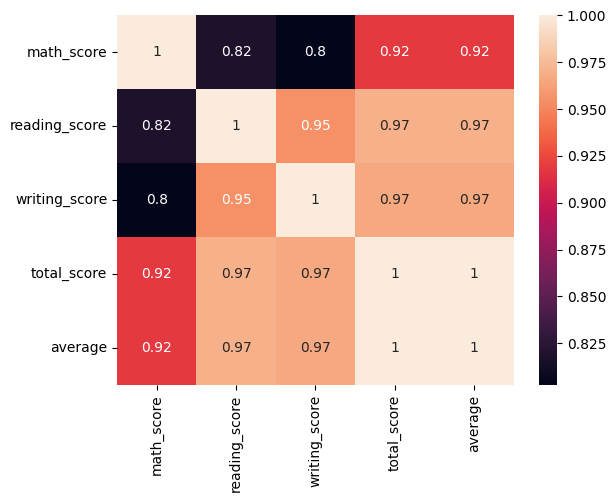

In [16]:
sns.heatmap(correlation_matrix,annot=True)

### Data visualization

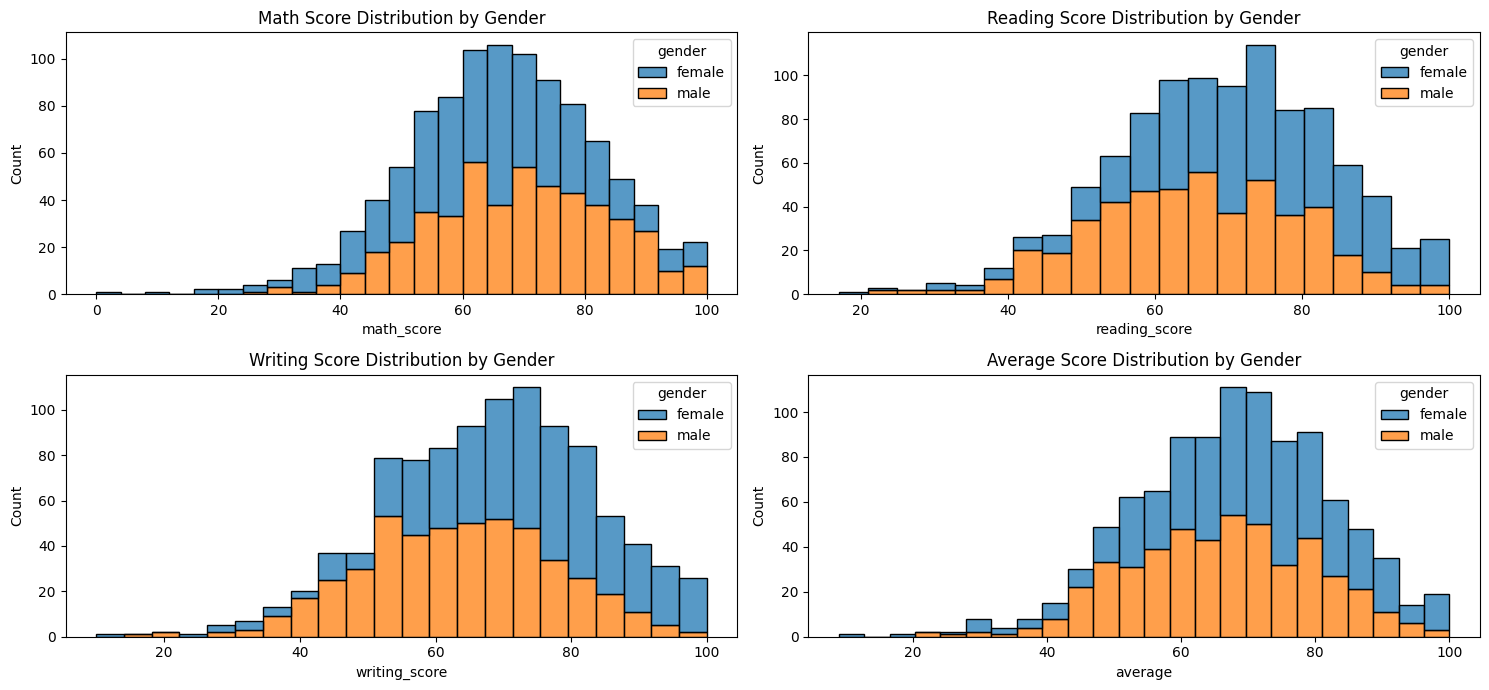

In [17]:
plt.figure(figsize=(15, 7))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='math_score', hue='gender', multiple='stack')
plt.title('Math Score Distribution by Gender')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='reading_score', hue='gender', multiple='stack')
plt.title('Reading Score Distribution by Gender')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='writing_score', hue='gender', multiple='stack')
plt.title('Writing Score Distribution by Gender')

# 4th subplot with hue
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='average', hue='gender', multiple='stack')
plt.title('Average Score Distribution by Gender')

plt.tight_layout()
plt.show()


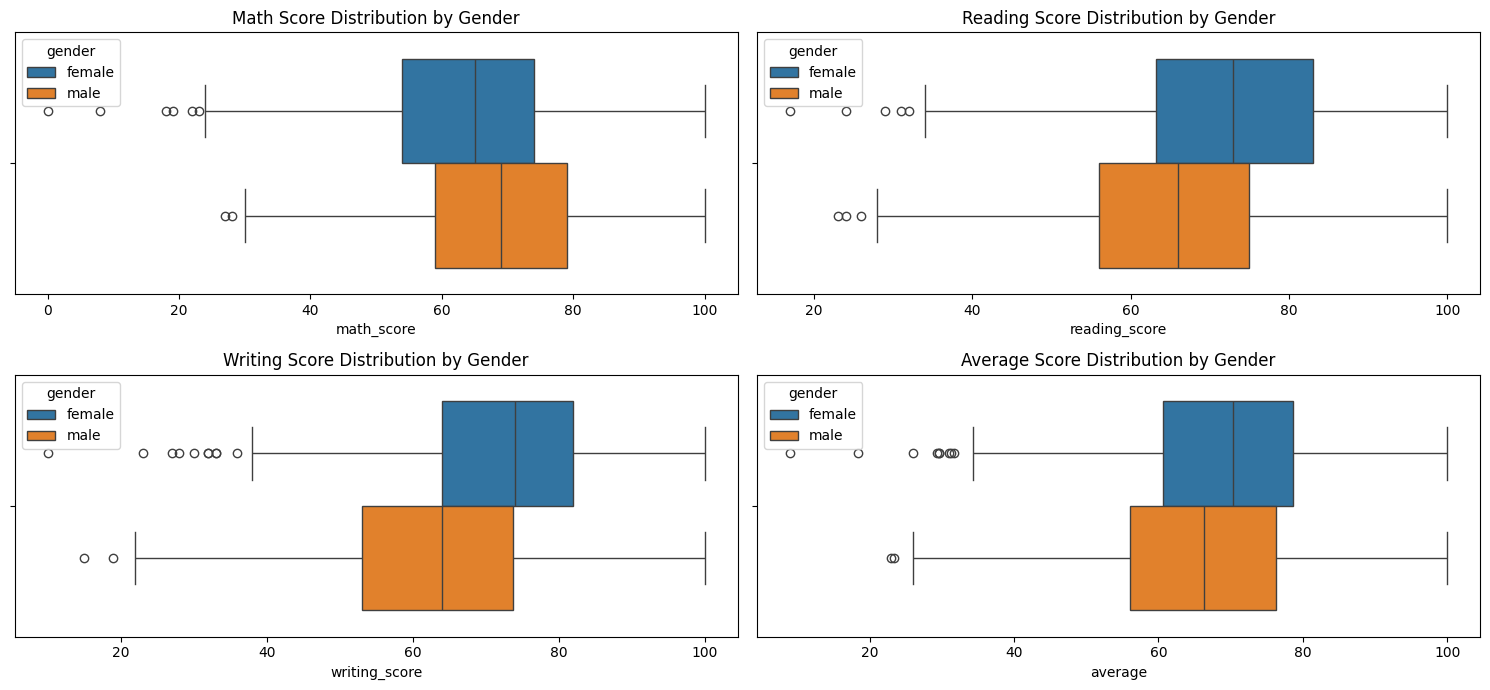

In [18]:
plt.figure(figsize=(15, 7))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='math_score', hue='gender')
plt.title('Math Score Distribution by Gender')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='reading_score', hue='gender')
plt.title('Reading Score Distribution by Gender')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='writing_score', hue='gender')
plt.title('Writing Score Distribution by Gender')

# 4th subplot with hue
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='average', hue='gender')
plt.title('Average Score Distribution by Gender')

plt.tight_layout()
plt.show()


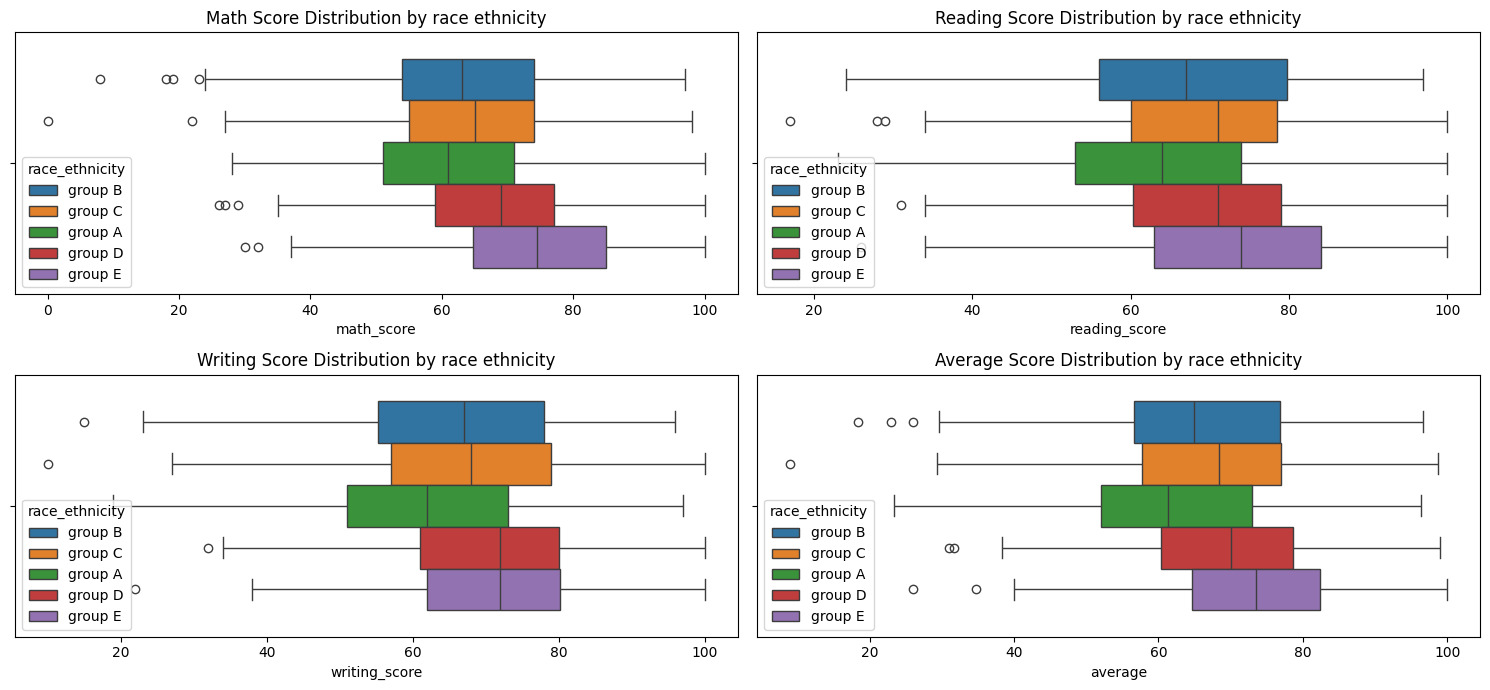

In [19]:
plt.figure(figsize=(15, 7))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='math_score', hue='race_ethnicity')
plt.title('Math Score Distribution by race ethnicity')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='reading_score', hue='race_ethnicity')
plt.title('Reading Score Distribution by race ethnicity')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='writing_score', hue='race_ethnicity')
plt.title('Writing Score Distribution by race ethnicity')

# 4th subplot with hue
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='average', hue='race_ethnicity')
plt.title('Average Score Distribution by race ethnicity')

plt.tight_layout()
plt.show()


Note - Group E race has performed well in all of the subjects while Group A skewness is behind all the other

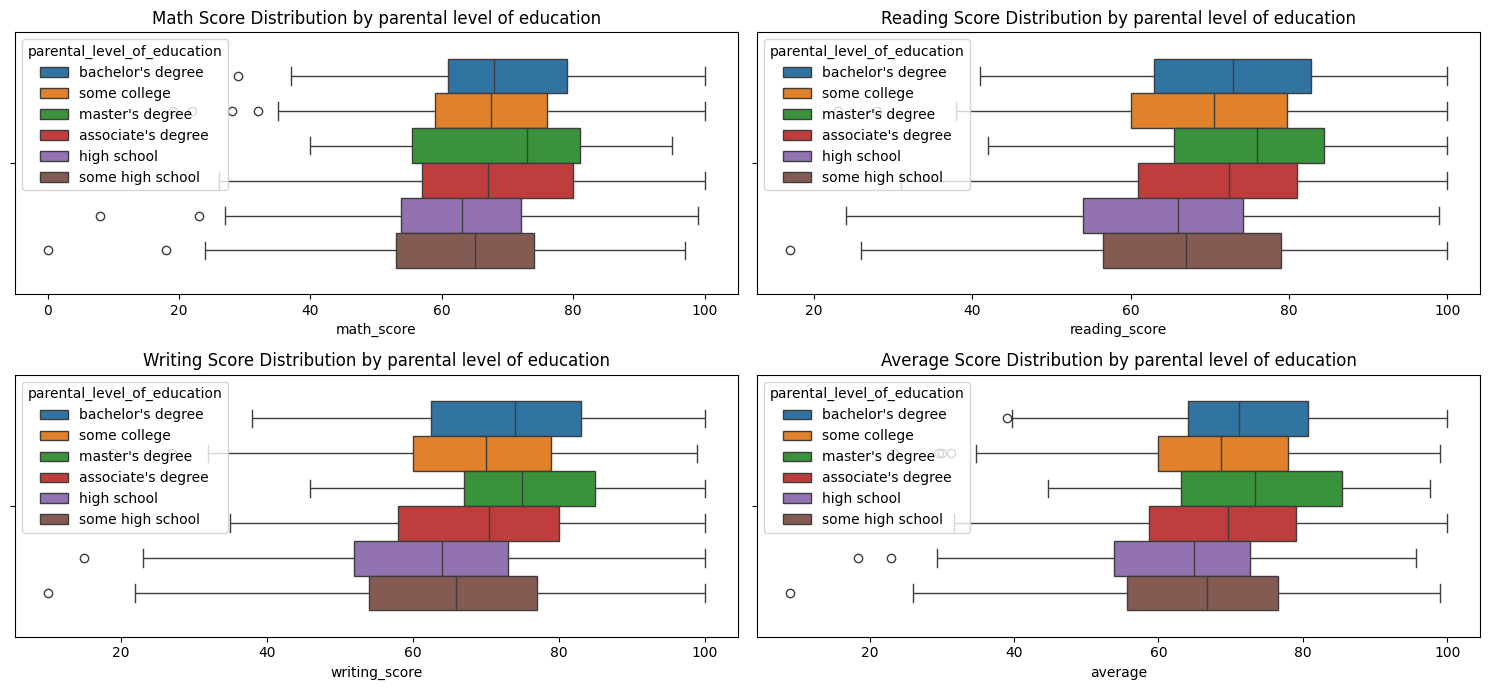

In [20]:
plt.figure(figsize=(15, 7))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='math_score', hue='parental_level_of_education')
plt.title('Math Score Distribution by parental level of education')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='reading_score', hue='parental_level_of_education')
plt.title('Reading Score Distribution by parental level of education')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='writing_score', hue='parental_level_of_education')
plt.title('Writing Score Distribution by parental level of education')

# 4th subplot with hue
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='average', hue='parental_level_of_education')
plt.title('Average Score Distribution by parental level of education')

plt.tight_layout()
plt.show()


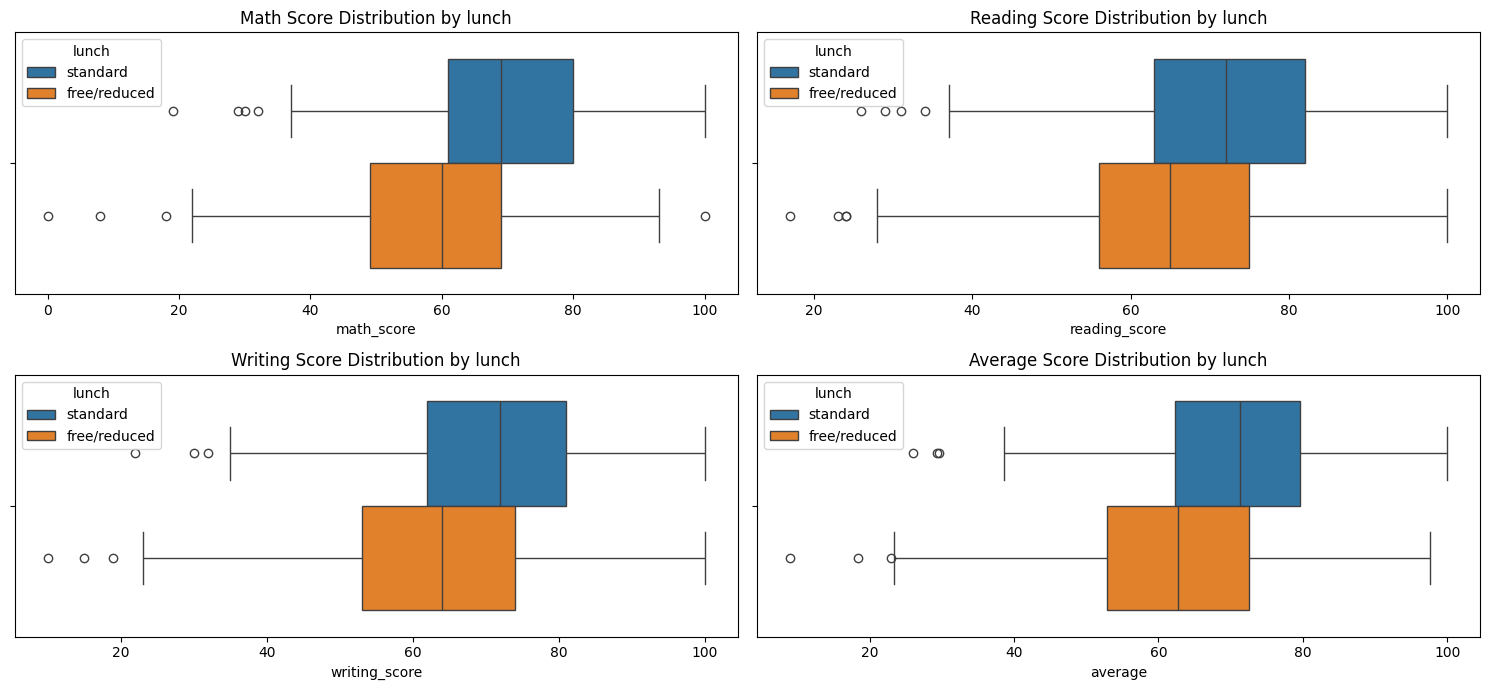

In [21]:
plt.figure(figsize=(15, 7))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='math_score', hue='lunch')
plt.title('Math Score Distribution by lunch')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='reading_score', hue='lunch')
plt.title('Reading Score Distribution by lunch')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='writing_score', hue='lunch')
plt.title('Writing Score Distribution by lunch')

# 4th subplot with hue
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='average', hue='lunch')
plt.title('Average Score Distribution by lunch')

plt.tight_layout()
plt.show()


C:\Users\Reyan Alam\AppData\Local\Temp\ipykernel_6128\2837977989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender',palette='tab10')
C:\Users\Reyan Alam\AppData\Local\Temp\ipykernel_6128\2837977989.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race_ethnicity',palette='tab10' )
C:\Users\Reyan Alam\AppData\Local\Temp\ipykernel_6128\2837977989.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='parental_level_of_education',palette='tab10')


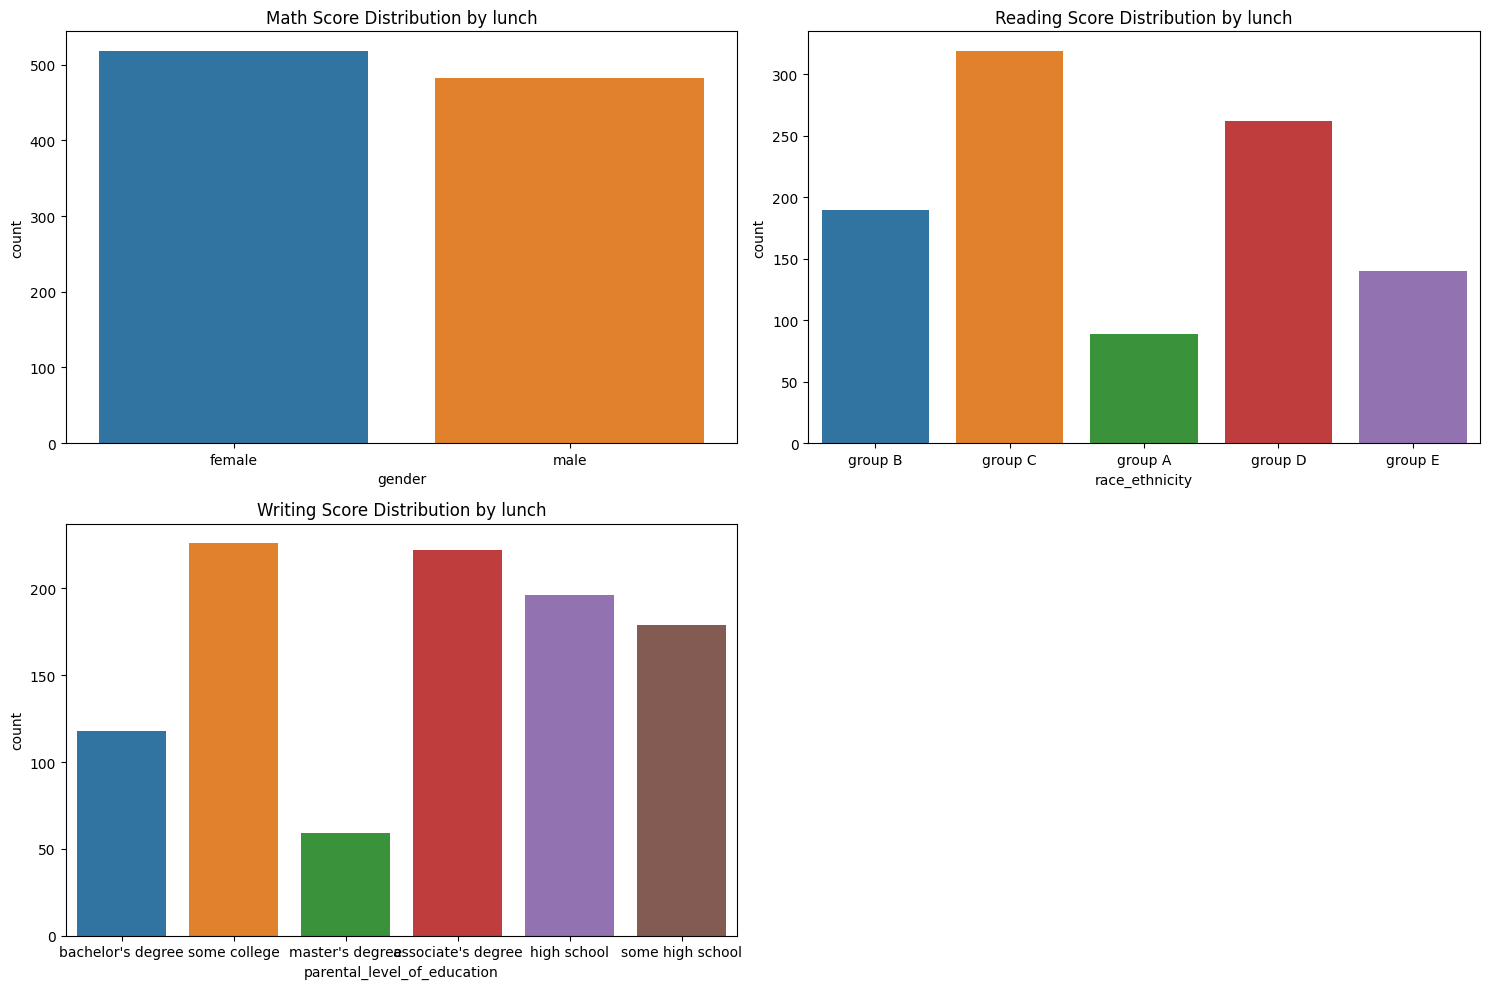

In [22]:
plt.figure(figsize=(15, 10))

# 1st subplot with hue
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender',palette='tab10')
plt.title('Math Score Distribution by lunch')

# 2nd subplot with hue
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='race_ethnicity',palette='tab10' )
plt.title('Reading Score Distribution by lunch')

# 3rd subplot with hue
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='parental_level_of_education',palette='tab10')
plt.title('Writing Score Distribution by lunch')

plt.tight_layout()
plt.show()
